In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import sine_data

In [2]:
nnfs.init()


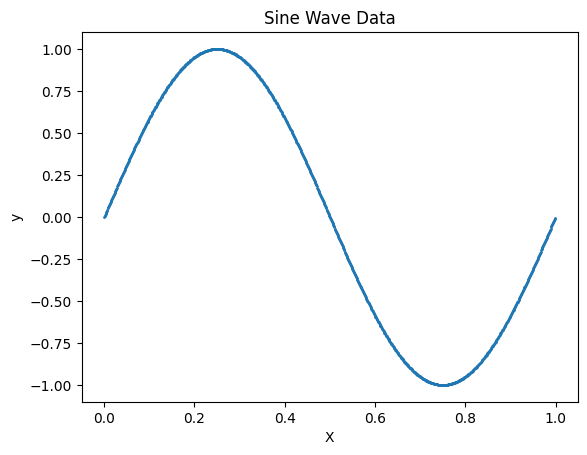

In [4]:
# Generate sine wave data
X, y = sine_data()
# Reshape y to be a 2D array with one column
y = y.reshape(-1, 1)
# Plot the sine wave data
plt.scatter(X, y, s=1)
plt.title('Sine Wave Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### linear Activation function

In [5]:
class Activation_linear:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs  # Linear activation is just the identity function
        return self.inputs

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        return self.dinputs

### Mean Squared Error Loss

The two main methods for calculating error in regression
are ​mean squared error​ (MSE) and ​mean absolute error​ (MAE).

quare the difference between the predicted and true values of
single outputs

<img src='./MSE.png' size="10px">

### Mean Squared Error Loss Derivative
The partial derivative of squared error with respect to the predicted value is:
<br>
<img src='./MSE-derivative-1.png' width="300">
<br>
1​ divided by ​J​ (the number of outputs) is a constant and can be moved outside of the derivative.
Since we are calculating the derivative with respect to the given output, ​j,​ the sum of one element
equals this element:
<br>
<img src='./MSE-derivative-2.png' width="300">
<br>
To calculate the partial derivative of an expression to the power of some value, we need to
multiply this exponent by the expression, subtract 1 from the exponent, and multiply this by the
partial derivative of the inner function:
<br>
<img src='./MSE-derivative-3.png' width="300">
<br>
The partial derivative of the subtraction equals the subtraction of the partial derivatives:
<br>
<img src='./MSE-derivative-4.png' width="300">
<br>

In [ ]:
class Loss:
    def calculate(self , output , y):
        sample_loss = self.forward(output, y)
        return np.mean(sample_loss, axis=-1)

In [ ]:
class Loss_MeanSquaredError(Loss):
    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean(np.square(y_true - y_pred))

    def backward(self, dvalues):
        samples = dvalues.shape[0]
        self.dinputs = 2 * (dvalues - self.y_true) / samples
        return self.dinputs

### Mean Absolute Error

In [ ]:
class Osss_MeanAbsoluteError(Loss):
    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean(np.abs(y_true - y_pred))

    def backward(self, dvalues):
        samples = dvalues.shape[0]
        self.dinputs = np.sign(dvalues - self.y_true) / samples
        return self.dinputs

In [6]:
accuracy_precision = np.std(y) / 250